In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import impt
import jax
import fitsio
import numpy as np
import jax.numpy as jnp
from fpfs import pltutil
import astropy.io.ascii as pyascii
import matplotlib.pylab as plt
import pandas as pd

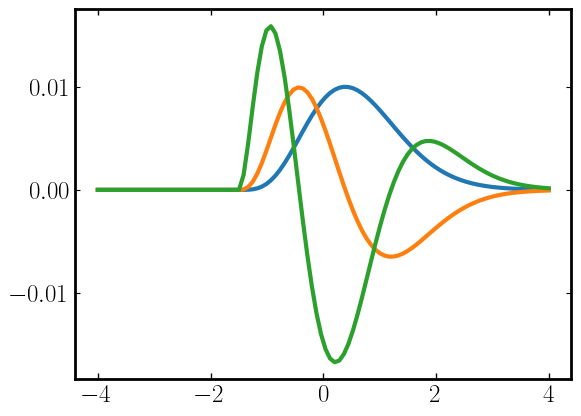

In [111]:
x = jnp.linspace(-4,4,100)
func = lambda a: impt.fpfs.utils.ssfunc3(a, mu = 1., sigma = 2.5) * jnp.exp(-(a+4)**2./6)
dfunc = jax.grad(func)
ddfunc =  jax.grad(dfunc)
dy1 = jax.lax.map(dfunc,x)
y2 = jax.lax.map(func,x)
dy2 = jax.lax.map(dfunc,x)
ddy2 = jax.lax.map(ddfunc,x)


plt.close()
#plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, dy2)
plt.plot(x, ddy2)

(5000, 4, 1)
(5000, 4, 1)
Separate galaxies into 2 bins: [26.5 26. ]
Multiplicative biases for those bins are:  [0.00347057 0.00078702]
Errors are:  [0.00118648 0.00106583]
Additive biases for those bins are:  [-1.34250194e-05 -1.51247429e-05]
Errors are:  [2.13715975e-05 1.80944444e-05]
         merr        
---------------------
0.0007596272996735466
0.0008288497028317802
0.0009605248685378594
0.0011558380258859047
 0.001439519033534418


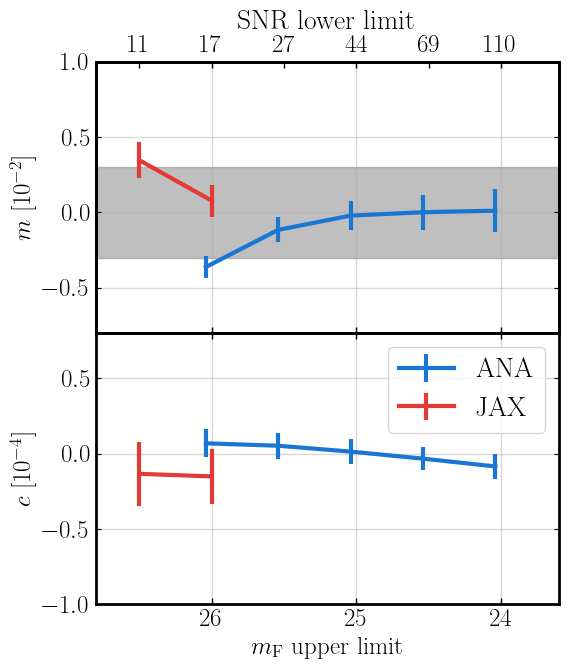

In [118]:
shear_value = 0.02
#maglist = [26.5, 26, 25.5, 25.0, 24.5, 24.]
maglist = [26.5, 26]
res = np.zeros((4, len(maglist)))
err = np.zeros((4, len(maglist)))
nsims = np.zeros(len(maglist))
for im,mm in enumerate(maglist):
    outs=[]
    for ii in range(0,10):
        fname = './sum_n2_basic1/try1_bin_%.1f_run%d.fits' %(mm,ii)
        if os.path.isfile(fname):
            dd = fitsio.read(fname)
            outs.append(dd)
    outs = np.vstack(outs)
    print(outs.shape)
    nsims[im] = outs.shape[0]
    res[:,im] = np.average(outs, axis=0)[:,0]
    err[:,im] = np.std(outs, axis=0)[:,0]
    
mbias = (res[1] / res[3] / 2.0 - shear_value) / shear_value
merr = (err[1] / res[3] / 2.0) / shear_value / np.sqrt(nsims)
cbias = res[2] / res[3]
cerr = err[2] / res[3] / np.sqrt(nsims)

print("Separate galaxies into %d bins: %s" % (len(res[0]), res[0]))
print("Multiplicative biases for those bins are: ", mbias)
print("Errors are: ", merr)
print("Additive biases for those bins are: ", cbias)
print("Errors are: ", cerr)
# make plot
plt.close()
fig,axes= plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(6,7))
#pltutil.make_figure_axes(ny=2,nx=1,square=False)

# read data
outs = pyascii.read('sum_n2_basic1/try1_bin_M00.csv')
msk = outs['binave']>23.5
x=outs['binave'][msk]
y1=outs['mbias'][msk]
yerr=outs['merr'][msk]
print(yerr)
z1=outs['cbias'][msk]
zerr=outs['cerr'][msk]

ax=axes[0]
xlabel=r'$m_{\rm F}$ upper limit'
ax.errorbar(np.array(x)+0.04,np.array(y1)*1e2,np.array(yerr)*1e2,label='ANA',color=pltutil.colors[1])
ax.errorbar(res[0],mbias*1e2,merr*1e2,color=pltutil.colors[2], label='JAX')

ax.set_ylabel('$m$ $[10^{-2}]$',fontsize=18)
ax.set_xlim(23.6,26.3)
ax.set_ylim(-0.8,1.)

ax.invert_xaxis()
ax.axhspan(-0.3,0.3,0,100,color='gray',alpha=0.5)
ax.grid()
axb = ax.twiny()
axb.set_xlim(23.6,26.8)
axb.set_xticks((26.5, 26, 25.5, 25, 24.5, 24))
axb.set_xticklabels(('11', '17', '27', '44', '69', '110'))
axb.set_xlabel('SNR lower limit')
axb.invert_xaxis()

ax=axes[1]
ax.errorbar(np.array(x)+0.04,np.array(z1)*1e4,np.array(zerr)*1e4, label='ANA',color=pltutil.colors[1])
ax.errorbar(res[0],cbias*1e4,cerr*1e4,color=pltutil.colors[2], label='JAX')
ax.legend()
ax.set_ylabel('$c$ $[10^{-4}]$',fontsize=18)
ax.set_xlim(23.6,26.8)
ax.set_ylim(-1,0.8)

ax.set_xlabel(xlabel,fontsize=18)
ax.grid()
ax.invert_xaxis()
fig.tight_layout()
fig.subplots_adjust(hspace=0)
fig.show()

(500, 3, 6)
[10.26031001 11.1152583  10.94922082  7.98904778  5.15611162  2.96443646]


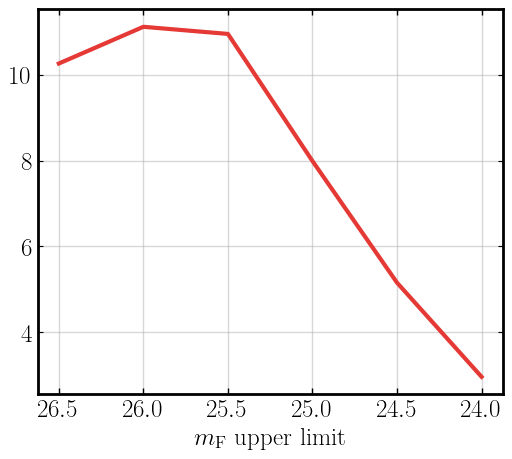

In [58]:
# make plot
plt.close()
fig,axes=pltutil.make_figure_axes(ny=1,nx=1,square=False)


if False:
    ## read data
    outs = pyascii.read('sum_n2_basic1/try1_bin_M00_neff.csv')
    x=outs['binave']
    y=outs['cerr']
    print(y)

    y=(0.26/(np.sqrt((0.2*7100/60/2.)**2.*np.pi)*y))**2.

    ax=axes[0]
    xlabel=r'$m_{\rm F}$ upper limit'
    ax.plot(np.array(x),np.array(y),label=r'$0.5$ arcsec',color=pltutil.colors[1])


outs = []
for ii in range(1):
    fname = './sum_n2_basic1/try1_bin_neff_run%d.fits' %ii
    dd = fitsio.read(fname)
    outs.append(dd)
outs = np.vstack(outs)
print(outs.shape)

res = np.average(outs, axis=0)
err = np.std(outs, axis=0)
    
cerr = err[1] / res[2] 
cerr=(0.26/(np.sqrt((0.2*7100/60/2.)**2.*np.pi)*cerr))**2.
print(cerr)



ax.legend()
ax.set_ylabel('n effective',fontsize=18)
ax.set_xlim(22.6,26.6)

x=res[0]
y=cerr
ax=axes[0]
xlabel=r'$m_{\rm F}$ upper limit'
ax.plot(np.array(x),np.array(y),color=pltutil.colors[2])

ax.set_xlabel(xlabel,fontsize=18)
ax.grid()
ax.invert_xaxis()
plt.show()

In [7]:
a=pyfits.getdata('cat_n1_basic1/cov_matrix.fits')
for imag in [27.5, 26.5,26,25.5,25,24.5, 24.]:
    print(10 ** (( 30.- imag) / 2.5)/np.sqrt(a[0,0]))
    print(10 ** (( 30.- imag) / 2.5))

12.027845563990123
10.0
30.212582072479474
25.118864315095795
47.88371565334542
39.810717055349734
75.8905749687308
63.09573444801933
120.27845563990122
100.0
190.62850554341557
158.48931924611142
302.1258207247948
251.18864315095797


In [8]:
for i in range(31):
    print(np.sqrt(a[i,i]))

0.8314040903500424
1.6267121188069564
1.0769006713005966
1.0768671560789613
2.878795046594358
1.954290973979016
1.9540790251071485
0.5290585597350104
0.5290591824353524
0.5290585597350107
0.5290591824353524
0.5290585597350104
0.5290591824353524
0.5290585597350107
0.5290591824353524
1.517166992522063
1.5137399550146442
1.5171669925220632
1.5137399550146442
1.517166992522063
1.5137399550146442
1.5171669925220632
1.5137399550146442
1.5135286499574403
1.5169664832131693
1.5135286499574403
1.5169664832131695
1.5135286499574403
1.5169664832131695
1.51352864995744
1.5169664832131693


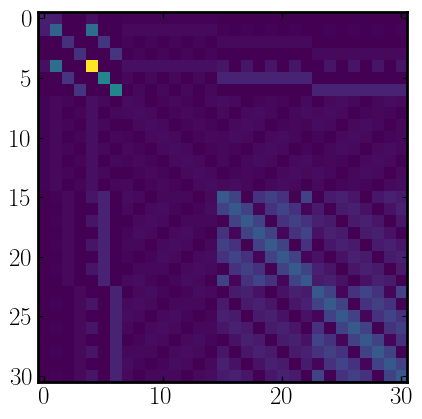

In [9]:
plt.imshow(np.abs(a))

In [10]:
1.5/2./0.6

1.25

In [105]:
pwd

'/lustre/work/xiangchong.li/work/FPFS2/descwl-shear-fpfs/tests/test2_lsst_blend_noisy1'

In [115]:
a = np.array([0.315, 0.371, 0.595, 1.155])

In [117]:
np.sqrt(1./np.sum(1./a**2.))

0.21864700107929727

In [9]:
import lsst.afw.image as afwimage

In [12]:
exp = afwimage.ExposureF.readFits('../../../sim_desc/test_basic/image-00000_g1-0_rot0_g.fits')

In [14]:
exp.getHeight()

7210

In [20]:
a = pyfits.getdata('cat_n2_basic1/src-02232_g1-0_rot0_i.fits')

In [21]:
len(a)

100828

In [13]:
35* 0.218 / 0.83

9.19277108433735